# hello magnet jupyter
アプリケーションを開発する上で、jupyter上で実行するためのサンプルコードを紹介します。

# 注意
- 本jupyterファイルはサンプル紹介のため、個人の検証用ファイルは別途作成してください。
- 検証のため、セキュリティ突破やpandasで利用しやすくするためのユーティリティを紹介していますが、あくまで検証用コードとして利用してください。

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pydantic import parse_obj_as
from pprint import pprint
from magnet import get_db, Linq



In [4]:
def get_ohlc():
    for db in get_db():
        rep = crud.CryptoOhlcDaily(db=db)
        result = [parse_obj_as(schemas.Ohlc, x).dict() for x in rep.query()]
        # schemas.Ohlc.from_orm_query_as_dict(rep.query())
    return result

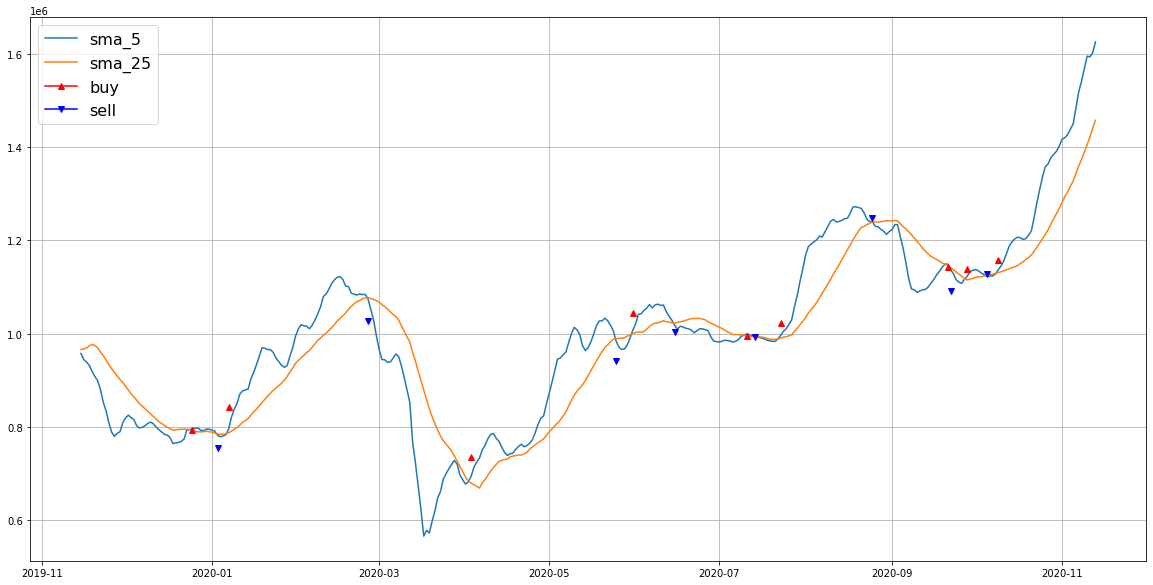

In [5]:
from magnet.datastore import crud, schemas

result = get_ohlc()
# print(schemas.Ohlc.__fields__["close_time"])
# print(schemas.Ohlc.from_orm(result))
for item in result:
    if item["t_cross"] == 0:
        item["t_cross_golden"] = None
        item["t_cross_dead"] = None
    elif item["t_cross"] == 1:
        item["t_cross_golden"] = item["close_price"]
        item["t_cross_dead"] = None
    elif item["t_cross"] == -1:
        item["t_cross_golden"] = None
        item["t_cross_dead"] = item["close_price"]


df = pd.DataFrame(result)[-365:]
plt.figure(figsize=(20, 10))
plt.grid()

plt.plot(df["close_time"], df["t_sma_5"], label="sma_5")
plt.plot(df["close_time"], df["t_sma_25"], label="sma_25")
plt.plot(df["close_time"], df["t_cross_golden"], marker="^", color="red", label="buy")
plt.plot(df["close_time"], df["t_cross_dead"], marker="v", color="blue", label="sell")
plt.legend(fontsize=16)
plt.show()

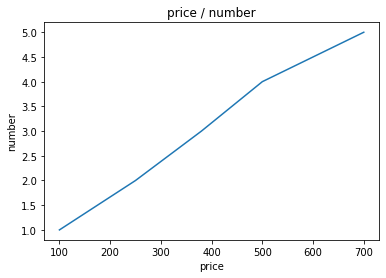

In [4]:
# matplotlib
price = [100, 250, 380, 500, 700]
number = [1, 2, 3, 4, 5]

plt.plot(price, number)
plt.title("price / number")
plt.xlabel("price")
plt.ylabel("number")

# 表示する
plt.show()

In [62]:
prices = [x for x in map(lambda x: x["close_price"], result)]
# print(prices)


def calc_recent_sma(arr, min=1, span1=5, span2=25, reverse=False):
    result1 = 0
    result2 = 0
    
    for index in range(span1):
        result1 += arr[index]
        
    for index in range(span2):
        result2 += arr[index]
    
    return result1 / span1, result2 / span2

def calc_target_price(arr, min=1, span1=5, span2=25, reverse=False):
    calc_arr = arr[:25]
    
    sma_5, sma_25 = calc_recent_sma(prices)

sma_5, sma_25 = calc_recent_sma(prices)
print(f"{sma_5}, {sma_25}")

269865.8, 286460.04


In [176]:

# def func(**kwargs):
#     print(kwargs)

def func(from):
print(kwargs)

dic1 = {"from": "bob", "age": 20}
# dic2 = {"name": "mary"}

func(**dic1)


SyntaxError: invalid syntax (<ipython-input-176-9f37d7590be8>, line 4)

In [182]:
dic1 = {"name": "bob", "age": 20}
dic2 = {"name": "mary"}


dic1.get

def func(name, age, **kwargs):
    print(f"{name}: {age}")


func(**dic1, **dic2)

TypeError: func() got multiple values for keyword argument 'name'

In [44]:
!pip install pydantic

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
from fastapi.encoders import jsonable_encoder
import datetime
import json
from pydantic import BaseModel, parse_obj_as, validator

class A(BaseModel):
    name: str
    dt: datetime.datetime
        
    @validator("dt")
    def valid_entry(cls, v, values, **kwargs):
        print(v)
        print(values)
        print(kwargs)
        return v

        

decoded = A(dt=datetime.datetime.now(), name="test")
decoded

print(None==0)

2020-11-06 21:58:20.881751
{'name': 'test'}
{'field': ModelField(name='dt', type=datetime, required=True), 'config': <class '__main__.Config'>}
False


In [2]:
from typing import Union
from pydantic import BaseModel, version

print(version.version_info())

class A(BaseModel):
    name: str = "test"


obj = A()
obj = {"name": "test"}
getattr(obj, "name")
    


             pydantic version: 1.6.1
            pydantic compiled: True
                 install path: /usr/local/lib/python3.8/dist-packages/pydantic
               python version: 3.8.0 (default, Oct 28 2019, 16:14:01)  [GCC 8.3.0]
                     platform: Linux-5.4.0-51-generic-x86_64-with-glibc2.27
     optional deps. installed: []


AttributeError: 'dict' object has no attribute 'name'

In [14]:
# a = {"name": "test", "parent": "mary"}
# # b = {"name": "bob", "age": 20}

# b = a.copy()

# b["name"] = "mary"

# print(a)
# print(b)

import inspect

a = "a"
# inspect.getmembers(a)

a += "test"

print(a)

atest


In [32]:
src = {"name": "bob", "age": 20, "nest": {"name": "mary", "age": 30}}

# 方法１（シャローコピー）
# copyメソッドと同様。copyメソッドを利用しましょう。
copy1 = dict(**src)

# 方法２（シャローコピー）
# copyメソッドと同様。copyメソッドを利用しましょう。
copy1 = dict(src)

# 方法３（シャローコピー）
copy1 = src.copy()

# 方法４（ディープコピー）
import copy
copy2 = copy.deepcopy(src)

# 結果確認
print(src)
# => {"name": "bob", "age": 20, "nest": {"name": "mary", "age": 30}}

copy1["age"] += 5
copy1["nest"]["age"] += 100
print(src)
# => {"name": "bob", "age": 20, "nest": {"name": "mary", "age": 130}}

print(copy1)
# => {"name": "bob", "age": 25, "nest": {"name": "mary", "age": 130}}

copy2["nest"]["age"] -= 30
print(src)
# => {"name": "bob", "age": 20, "nest": {"name": "mary", "age": 130}}

print(copy2)
# => {"name": "bob", "age": 20, "nest": {"name": "mary", "age": 0}}

{'name': 'bob', 'age': 20, 'nest': {'name': 'mary', 'age': 30}}
{'name': 'bob', 'age': 20, 'nest': {'name': 'mary', 'age': 130}}
{'name': 'bob', 'age': 25, 'nest': {'name': 'mary', 'age': 130}}
{'name': 'bob', 'age': 20, 'nest': {'name': 'mary', 'age': 130}}
{'name': 'bob', 'age': 20, 'nest': {'name': 'mary', 'age': 0}}


In [231]:
a = dict(name="test", age=20)

dict(name="val1", key2="val2", **a)

TypeError: type object got multiple values for keyword argument 'name'

In [42]:
from dataclasses import dataclass
from pydantic import BaseModel

# @dataclass
class Parent(BaseModel):
    name: str
    age: int = 0

# @dataclass
class Child(BaseModel):
    name: str
    age: int = 0
    parent: User = User(name="parent", age=40)

        
a = Child(name="child", age=20)
b = Child(name="child", age=20)

print(id(a.parent) == id(b.parent))


False
